# Metaflow

### Hyper-parameter Search using Metaflow branchs MovieStatsFlow. 

## Import the metaflow client

In [1]:
from metaflow import Flow, get_metadata
import matplotlib.pyplot as plt
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/rkazinnik/Library/Preferences/PyCharm2019.1/metaflow/metaflow-tutorials


## Get statistics from the latest run of flow RK002StatsFlow

In [2]:
run = Flow('RK002StatsFlow').latest_successful_run
print("Using run: %s" % str(run))

genre_stats = run.data.genre_stats

Using run: Run('RK002StatsFlow/1583367211824848')


In [3]:
for run in Flow('RK002StatsFlow').runs():
    if run.successful:
        print("Playlist generated on %s" % run.finished_at)
        #print("Playlist for movies in genre '%s'" % run.data.genre)
        print(run.data)
        print("data.name '%s'" % run.data.name)
        keys = list(run.data.genre_stats.keys())
        print(" experiments epocs (keys) ", keys)
        branch0 = run.data.genre_stats[keys[-1]]
        bkeys = list(branch0)
        print("branch0 keys ", bkeys)
        print("branch0 train_auc test_auc = ", branch0['train_auc'],  branch0['test_auc'])
        #if run.data.playlist:
        #    print("Top Pick: '%s'" % run.data.playlist[0])
        print('\n')

Playlist generated on 2020-03-05T00:18:09.fZ
<MetaflowData: name, genre_stats, alpha>
data.name 'RK002StatsFlow'
 experiments epocs (keys)  [100, 200, 300, 400, 500]
branch0 keys  ['train_auc', 'test_auc', 'history_auc', 'history_loss', 'history_val_loss', 'model_name']
branch0 train_auc test_auc =  0.6438008 0.43862006


Playlist generated on 2020-03-05T00:13:16.fZ
<MetaflowData: name, genre_stats, alpha>
data.name 'RK002StatsFlow'
 experiments epocs (keys)  [500]
branch0 keys  ['train_auc', 'test_auc', 'history_auc', 'history_loss', 'history_val_loss', 'model_name']
branch0 train_auc test_auc =  0.7435484 0.53612626


Playlist generated on 2020-03-05T00:03:05.fZ
<MetaflowData: name, genre_stats, alpha>
data.name 'RK002StatsFlow'
 experiments epocs (keys)  [500]
branch0 keys  ['train_auc', 'test_auc', 'history_auc', 'history_loss', 'history_val_loss', 'model_name']
branch0 train_auc test_auc =  0.6995102 0.4998482


Playlist generated on 2020-03-04T23:31:39.fZ
<MetaflowData: name, gen

## Create a bar plot 

In [4]:
run = Flow('RK002StatsFlow').latest_successful_run
print("Using run: %s" % str(run))

print(list(run.data.genre_stats))
branch = run.data.genre_stats[list(genre_stats)[-1]]
print(list(branch))

h1 = branch['history_loss']
h2 = branch['history_val_loss']
h3 = branch['history_auc']

Using run: Run('RK002StatsFlow/1583367211824848')
[100, 200, 300, 400, 500]
['train_auc', 'test_auc', 'history_auc', 'history_loss', 'history_val_loss', 'model_name']


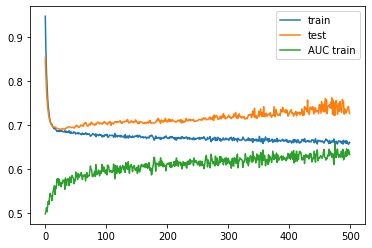

In [5]:
from matplotlib import pyplot

pyplot.plot(h1, label="train")
pyplot.plot(h2, label="test")
pyplot.plot(h3, label="AUC train")
pyplot.legend()

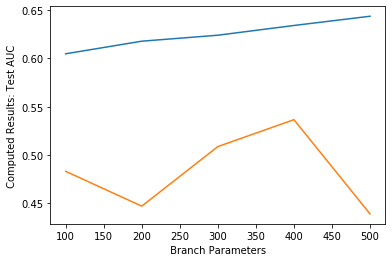

In [21]:
d = run.data.genre_stats # dic
branch, auc_test_auc = zip(*[(k, d[k]['train_auc']) for k in sorted(list(d)) ])
branch2, test_auc = zip(*[(k, d[k]['test_auc']) for k in sorted(list(d)) ])

# Create the bar plot
#plt.bar(branch[-5:], auc_test_auc[-5:], align='center', alpha=0.5)
pyplot.plot(branch, auc_test_auc)
pyplot.plot(branch2, test_auc)
plt.ylabel(" Computed Results: Test AUC ")
plt.xlabel(" Branch Parameters ")
plt.show()

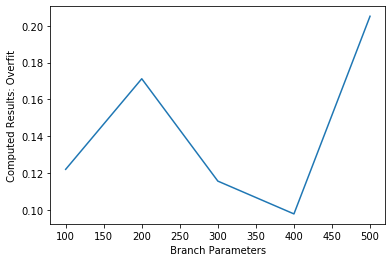

In [18]:
d = run.data.genre_stats # dic
branch, auc_test_auc = zip(*[(k, abs(d[k]['train_auc']-d[k]['test_auc'])) for k in sorted(list(d)) ])
# Create the bar plot
#plt.bar(branch, auc_test_auc)
pyplot.plot(branch, auc_test_auc)
#plt.bar(branch[:], auc_test_auc[:], align='center', alpha=0.9)
plt.ylabel(" Computed Results: Overfit ")
plt.xlabel(" Branch Parameters ")
plt.show()

In [11]:
branch

(100, 200, 300, 400, 500)

In [12]:
auc_test_auc

(0.12199932, 0.17121601, 0.115597785, 0.09777248, 0.20518073)